https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import skimage.io as io
from pycocotools.coco import COCO

## Download the annotation files and set the path to "instances" annotations

https://cocodataset.org/#download

In [4]:
dataDir = '/Users/khoingo/mlai/cocodataset'
dataType = 'val2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)

## Expriment with the dataset

In [5]:
# initialize COCO api for instance annotations
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.28s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor furniture person appliance accessory kitchen sports animal indoor food vehicle electronic


### Get all images for a set of categories

In [7]:
# get all images containing given categories
catIds = coco.getCatIds(catNms=['car']);
imgIds = coco.getImgIds(catIds=catIds);

In [9]:
catIds

[3]

In [10]:
len(imgIds)

535

### Get annotations, with iscrow=0 (single object instance segmentation)

In [12]:
annIds = coco.getAnnIds(imgIds=imgIds, catIds=catIds, iscrowd=0)

In [13]:
len(annIds)

1918

In [14]:
# load annotations given annotation IDs
anns = coco.loadAnns(annIds)

In [15]:
anns[0]

{'segmentation': [[446.65,
   301.37,
   437.02,
   302.04,
   436.02,
   301.54,
   435.35,
   297.72,
   438.34,
   296.89,
   438.68,
   294.73,
   447.15,
   294.23,
   448.81,
   298.05,
   448.48,
   301.04]],
 'area': 82.66089999999997,
 'iscrowd': 0,
 'image_id': 532481,
 'bbox': [435.35, 294.23, 13.46, 7.81],
 'category_id': 3,
 'id': 1342996}

### Get images with 1 segmentation and area above some threshold

In [43]:
# get image ids
img_ids = [ann['image_id'] for ann in anns if ann['area'] > 30000 and len(ann['segmentation']) == 1]

In [44]:
len(img_ids)

50

### Load one sample image and show annotations

In [45]:
img_id = img_ids[20]

In [46]:
# load image
img = coco.loadImgs(ids=[img_id])[0]

In [47]:
img

{'license': 3,
 'file_name': '000000338718.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000338718.jpg',
 'height': 445,
 'width': 500,
 'date_captured': '2013-11-17 02:03:01',
 'flickr_url': 'http://farm1.staticflickr.com/12/18425160_e4eef1d1bd_z.jpg',
 'id': 338718}

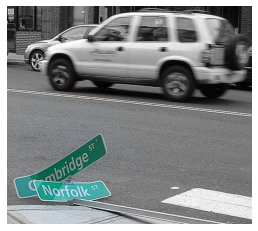

In [48]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

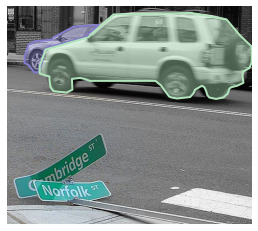

In [49]:
# load and display instance annotations, only for specified categories
plt.imshow(I); plt.axis('off')
img_ann_ids = coco.getAnnIds(imgIds=[img_id], catIds=catIds)
img_anns = coco.loadAnns(img_ann_ids)
coco.showAnns(img_anns)

In [50]:
img_anns

[{'segmentation': [[93.0,
    63.69,
    136.0,
    40.69,
    187.0,
    37.69,
    158.0,
    62.69,
    91.0,
    81.69,
    85.0,
    81.69,
    75.0,
    90.69,
    73.0,
    104.69,
    71.0,
    114.69,
    67.0,
    125.69,
    64.0,
    132.69,
    62.0,
    134.69,
    55.0,
    134.69,
    42.0,
    118.69,
    35.0,
    115.69,
    35.0,
    102.69,
    40.0,
    87.69,
    43.0,
    77.69,
    56.0,
    70.69,
    92.0,
    67.69]],
  'area': 4117.0,
  'iscrowd': 0,
  'image_id': 338718,
  'bbox': [35.0, 37.69, 152.0, 97.0],
  'category_id': 3,
  'id': 352770},
 {'segmentation': [[121.0,
    176.0,
    94.0,
    173.0,
    88.0,
    165.0,
    86.0,
    150.0,
    86.0,
    143.0,
    78.0,
    141.0,
    66.0,
    137.0,
    66.0,
    122.0,
    78.0,
    88.0,
    165.0,
    63.0,
    217.0,
    16.0,
    376.0,
    13.0,
    448.0,
    26.0,
    476.0,
    59.0,
    500.0,
    82.0,
    500.0,
    98.0,
    500.0,
    114.0,
    495.0,
    126.0,
    482.0,
    133.0,
 

In [31]:
len(img_anns)

2